# Lecture 8

**Authors:**
* Yilber Fabian Bautista
* 

**Last date of modification:**
 December 29th 2021

Hello there, 

Welcome to Lecture 8 of this mini-lecture series on programing with Python. In this series, you will learn  basic and intermediate python tools that will be of great use in your scientific carer

**Objectives:** 

By the end of this lecture you will be able to:
* Create, modify, save, and interact with **HDF5** files
* **Fit** curves to a given set of data points using **curve_fit** module in ** scipy.optimize** library

## HDF5 files

See documentation [here](https://docs.h5py.org/en/stable/quick.html).

**HDF** stands for “Hierarchical Data Format”. An HDF5 file contains two kinds of objects: `datasets`, which are **array-like** collections of data, and ` groups`, which are **folder-like** containers that hold datasets and other groups. Schematically, an **HDF5** file looks as follows

<img src="Figures/HDF5_gen.png" width="600" height="400">


Figure taken from [here](https://icmplus.neurosurg.cam.ac.uk/home/icm-features/hdf5-new-icm-data-format/).
The Groups and datasets can be further commentated with **metadata**  contained in associated **Attributes**. We will expand on this bellow. 

The fundamental thing to have in mind when dealing with **HDF5** files is: **Groups** are used  like **dictionaries**, whereas **datasets** work like **NumPy arrays**. 

### Opening  HDF5 files

Let us suppose someone handled us an `HDF5` file and we want to use it. 
First we have to import the `h5py` library in python to manipulate such a file. This is done through the command
```py
import h5py
````
To open our existing `HDF5` file we have two options:

 * The syntax for the first one is:

```py
f = h5py.File('myfile.hdf5','r')
# Do something

f.close()

```
Here the `close()` attribute closes the `HDF5` file if no longer needed. 

* The second option is via a `with` block:

```py
with h5py.File('myfile.hdf5', 'r') as f:
    # Do something
        
```
For this second method, to close the  `HDF5` file we just need to leave the `with` block.

The keyword `r` stands for `read`, which means we can only read but not modify the `HDF5` file. In the next table we can see other keywords commonly used when dealing with data files. We will use some of them bellow
<img src="Figures/rwa.png" width="600" height="400">


Let us make the discussion more precise with the following example:

We are handled the `mytestfile.hdf5` file and we want to access all the information contained inside it. We start by opening the file using the ` h5py` library

In [1]:
import h5py

# Open a hdf5 file
f = h5py.File('mytestfile.hdf5','r')

# Close the file if no longer needed
#f.close()

### Keys of a HDF5 file

Likewise for dictionaries,  we can as for the set of keys contained in the file if not known beforehand, using the attribute `keys()`: 
```py
f.keys()
```
which will produce the output
```py
<KeysViewHDF5 ['mydataset', 'mygroup']>
```
This means our `HDF5` file has two objects labeled by the keys `'mydataset'` and  `'mygroup'`. In principle they can correspond to either **datasets** or **groups** of our `HDF5` file. 

### Accessing a group or data set 
To explicitly know the nature of the two keys in our example, we need to call our file `f` with the specific key using an dictionary-like syntax:
```py
f['mydataset']
```
with output 

```py
<HDF5 dataset "mydataset": shape (20,), type "<i4">
```
Therefore,  `"mydataset"` indeed corresponds to a **dataset** in the `HDF5` file. It is a row vector with 20 entries, whose elements are  integers. 

We can do the same for the remaining key
```py
f['mygroup']
```
with output 
```py
<HDF5 group "/mygroup" (1 members)>
```
This means that `mygroup` corresponds instead to a **group** in our  `HDF5` file, and hosts another element which can be either a **dataset** or a **group**. Recall **groups** are like **dictionaries**, and therefore, the logic to access the keys for the elements contained in the group is the same,  that is, by using the `key()` attribute. 
```py
f['mygroup'].keys()
```
with output 
```py
<KeysViewHDF5 ['newdataset']>
```

In [2]:
# Try it yourself

### Accessing the information in a dataset 

Now that we know how to ask for the keys in a `HDF5` file, and access the groups and datasets inside them, we want to be able to use the information stored in the datasets themselves. Recall **datasets** are like **np.arrays**, and therefore we can use all of the numpy machinery on them. Let us see that with the dataset contained in `'mydataset'` keyword in our previous example

In [3]:
data = f['mydataset']
data[:]

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95], dtype=int32)

We can for instance slice the array,
```py
data[2:-3]
```
or even plot it

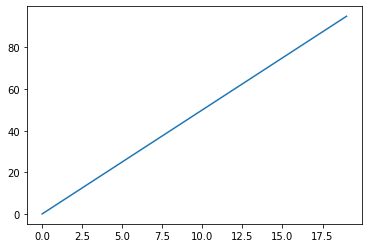

In [4]:
import matplotlib.pyplot as plt 
plt.plot(data)

Similarly, one  can now ask how to access the dataset contained in the group `'mygroup'`. For that we have several options:
* By assigning a new variable to `f['mygroup']`, and then accessing `'newdataset'` using it as a keyword
```py
grp = f['mygroup']
dset = grp['newdataset']
dset
```
with output 

```py
<HDF5 dataset "newdataset": shape (), type "<f8">
```
That means that `dset` is a scalar (shape() array), and therefore to access it we use the syntax
```py
dset[()]
```
which will produce as output the float number `50.0`

In [5]:
# Try it yourself

* We avoid too many variable assignation we can simply use repeated indexing
```py
dset = f['mygroup']['newdataset']
```
which will have the same effect. 

* To avoid too many square brackets we can simply use a path-like argument:
```py
dset = f['/mygroup/newdataset'][()]
dset
```
where we have already  accessed the scalar element, getting as output the number `50.0`.  This is the path specification for Mac and Linux. For windows you will probably have to use
```py
dset = f['\\mygroup\\newdataset'][()]
dset
```


In [6]:
#try it yourself

We then see that it is very simple to navigate through the `HDF5` file by using keyword arguments. 

### Attributes of  groups and data sets
The last element to explore in our `HDF5` file is to ask for the **Metadata** stored in **attributes** of the `HDF5` file itself, groups and datasets.  For that we use the `.attrs` proxy. See [documentation](https://docs.h5py.org/en/stable/high/attr.html#h5py.AttributeManager.keys). Let us see for instance if our `HDF5` has attribute keywords:

In [7]:
f.attrs.keys()

<KeysViewHDF5 []>

the output is an empty list meaning that the file itself does not have attribute keywords. We can ask the same for the groups and datasets

In [8]:
f['mygroup'].attrs.keys()

<KeysViewHDF5 ['new_atribute']>

in this case, the group itself has an attribute given by the keyword `'new_atribute'`. We can access its content in the usual indexing-like form

In [9]:
f['mygroup'].attrs['new_atribute']

1.0

As we see, the attribute just has assigned the integer value 10.  You can check that the datasets do not have any attribute by using the same logic
```py
f['mygroup/newdataset'].attrs.keys()
```
and 
```
f['mydataset'].attrs.keys()
```
both of which produce as output an empty list.

Attributes have the following properties as specified in the [documentation](https://docs.h5py.org/en/stable/high/attr.html#h5py.AttributeManager.keys)

* They may be created from any scalar or NumPy array
* Each attribute should be small (generally < 64k)
* There is no partial I/O (i.e. slicing); the entire attribute must be read.

### Closing the `HDF5` file

Once we finish using the file we can simply close it using the `close()` attribute. 

In [10]:
f.close()

# Exercise 1
Repeat the all the above discussion but opening the file using a `with` block. Hint: use the `'r'` argument, and recall indentation is important.  `print` statements are also useful.

## Creating an HDF5 file

We might now wonder how was `mytestfile.hdf5` file created. We simply used the following code:
```py
import h5py
import numpy as np

with h5py.File('mytestfile.hdf5', 'w') as g:
 
    dset = g.create_dataset("mydataset", (20,),data = np.arange(0,100,5), dtype='i')
    grp2 = g.create_group('mygroup')
    dset2 = grp2.create_dataset("newdataset", data = 50.)
    grp2.attrs['new_atribute'] = 1.0
```
which we will proceed to explain in detail. 

1. The first step is of course to create the datafile with the given name, in this case `mytestfile.hdf5`, and use the `'w'` (write) keyword, as indicated in the table above. We create the file under the alias `g`. Up to here, a new `HDF5` file will be created in the same location of our notebook. (To specify a particular location we use the path for it. example: `with h5py.File('Documents/my_files/Explore/.../mytestfile.hdf5', 'w') as g` ). The newly created file will be an empty file which we then proceed to fill with **groups** and **datasets**

2. In the first indented line ` dset = g.create_dataset("mydataset", (20,),data = np.arange(0,100,5), dtype='i')` we have created a new dataset, whose keyword is `"mydataset"`. It contain a vector with 20 entries, given by the `20` elements of the array `np.arange(0,100,5)`. We further specified the data type using the ` dtype` keyword.  
3. In the second line `grp2 = g.create_group('mygroup')`, we simply added a new group, as clearly indicated by the syntax. 
4. In the next line we have added a new dataset to our existing group, where now the data corresponds to a scalar object
5. Finally we assigned the attribute `'new_atribute'` with value `1.0`, to the existing **group**. 

And that's it! 

# Exercise 2
Create your own `HDF5` file including groups, datasets and attributes. 

## Modifying an existing `HDF5` file

In lecture 5 we learned how to modify `csv` files using **pandas** library. Existing `HDF5` files can also be modified. Let us see how this work with an specific example. 

First let us create a new `HDF5` file example

In [11]:
import h5py
import numpy as np

with h5py.File('test_file.hdf5', 'w') as t:
    dat = np.random.random((10,10))
    dset = t.create_dataset("rand2d",data = dat)

Let us now open it using the `r+` keyword, which stands for read and write, as shown explicitly in our table above. 

In [12]:
test  = h5py.File('test_file.hdf5','r+')

# To see we are able to use our file, let us for instance print the values contained in our dataset  
print('Dataset rand2d: ', test['rand2d'][:])

# Let us now for instance add a group into our existing file, a data set in that group, and an additional subgroup
new_group = test.create_group('test_group')
new_sub_group = new_group.create_group('test_sub_group')
new_dset = new_group.create_dataset("geom_space",data = np.geomspace(1,100,50))

# Check that the group was added correctly by, for instance, checking the keys  
print()
print('keys after adding test_group and : ' , test.keys())

# And access our `'geom_space'` dataset
print()
print('geom_space data', test['test_group/geom_space'][:])

#Close the file
test.close()

Dataset rand2d:  [[0.47303875 0.00185955 0.39730477 0.07430868 0.17485502 0.25681984
  0.55515063 0.67084517 0.7680498  0.91349884]
 [0.35075328 0.78415693 0.57242067 0.13128179 0.95548179 0.62567705
  0.72206224 0.45737436 0.60420352 0.0307579 ]
 [0.01371305 0.82773081 0.9960302  0.4083762  0.8294101  0.68678394
  0.03190753 0.04539914 0.68200537 0.90963546]
 [0.39572538 0.88374697 0.5600418  0.78138835 0.72433941 0.09401458
  0.51321568 0.87251261 0.6690137  0.50878722]
 [0.77729401 0.78459341 0.75890426 0.61670207 0.55321    0.19698551
  0.74926632 0.57301041 0.70684834 0.97121521]
 [0.57296059 0.84465329 0.8492833  0.42233857 0.41338177 0.08172171
  0.18735563 0.89391625 0.09626753 0.64020893]
 [0.90916676 0.94878361 0.232138   0.81820577 0.00689707 0.49200832
  0.91192174 0.67840576 0.45701372 0.36064755]
 [0.30937057 0.99092873 0.42347961 0.281966   0.28216922 0.7679035
  0.46525736 0.7260462  0.33013594 0.05166663]
 [0.98142504 0.59521607 0.41364011 0.91250429 0.94450926 0.02703

Finally we check that our original `'test_file.hdf5'` file has saved all the changes made above by opening it using the `r` mode.

In [13]:
with h5py.File('test_file.hdf5','r') as t2:
    print('keys', t2.keys())
    print()
    print('geom_space_data',  t2['test_group/geom_space'][:])

keys <KeysViewHDF5 ['rand2d', 'test_group']>

geom_space_data [  1.           1.09854114   1.20679264   1.32571137   1.45634848
   1.59985872   1.75751062   1.93069773   2.12095089   2.32995181
   2.55954792   2.8117687    3.0888436    3.39322177   3.72759372
   4.09491506   4.49843267   4.94171336   5.42867544   5.96362332
   6.55128557   7.19685673   7.90604321   8.68511374   9.54095476
  10.48113134  11.51395399  12.64855217  13.89495494  15.26417967
  16.76832937  18.42069969  20.23589648  22.22996483  24.42053095
  26.82695795  29.47051703  32.37457543  35.56480306  39.06939937
  42.9193426   47.14866363  51.79474679  56.89866029  62.50551925
  68.6648845   75.43120063  82.86427729  91.0298178  100.        ]


Once has to be careful when modifying `HDF5` files, since datasets added using already existing keywords as names, will overwrite the existing datasets. Similarly, `HDF5` files created with names of files already existing, will overwrite the existing files. 

Notice we have  interchangeably manipulate `HDF5` using or not the `with` blocks, to show the equivalence of the different ways of handle data files. 